Name: Smit Soni

In [ ]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from google.colab import files
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
plt.style.use('ggplot')

In [ ]:
# Read CSV file
df = pd.read_csv('/content/daily-minimum-temperatures-in-me.csv', on_bad_lines='skip', parse_dates=['Date'])

In [ ]:
# Rename necessary columns
df.columns = ['Date', 'Temp']
df['Date'] = pd.to_datetime(df['Date'])
df['Temp'] = pd.to_numeric(df['Temp'], errors='coerce')
df.dropna(inplace=True)
df.set_index('Date', inplace=True)

In [ ]:
# Print the number of rows and columns in the data
print("Shape:", df.shape)

Shape: (3647, 1)


In [ ]:
# Show info about the dataframe
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3647 entries, 1981-01-01 to 1990-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3647 non-null   float64
 1   Month   3647 non-null   int32  
 2   Year    3647 non-null   int32  
dtypes: float64(1), int32(2)
memory usage: 85.5 KB
None


In [ ]:
# Show how many missing values there are in each column
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Temp     0
Month    0
Year     0
dtype: int64


In [ ]:
# Show basic statistics
print("\nSummary statistics:\n", df.describe())


Summary statistics:
               Temp        Month         Year
count  3647.000000  3647.000000  3647.000000
mean     11.186647     6.520154  1985.502331
std       4.061671     3.448957     2.872579
min       0.000000     1.000000  1981.000000
25%       8.300000     4.000000  1983.000000
50%      11.000000     7.000000  1986.000000
75%      14.000000    10.000000  1988.000000
max      26.300000    12.000000  1990.000000


In [ ]:
# Display first few rows with date and temp in Celcius
df.head(10)

,Temp,Month,Year
Date,,,
1981-01-01,20.7,1,1981
1981-01-02,17.9,1,1981
1981-01-03,18.8,1,1981
1981-01-04,14.6,1,1981
1981-01-05,15.8,1,1981
1981-01-06,15.8,1,1981
1981-01-07,15.8,1,1981
1981-01-08,17.4,1,1981
1981-01-09,21.8,1,1981


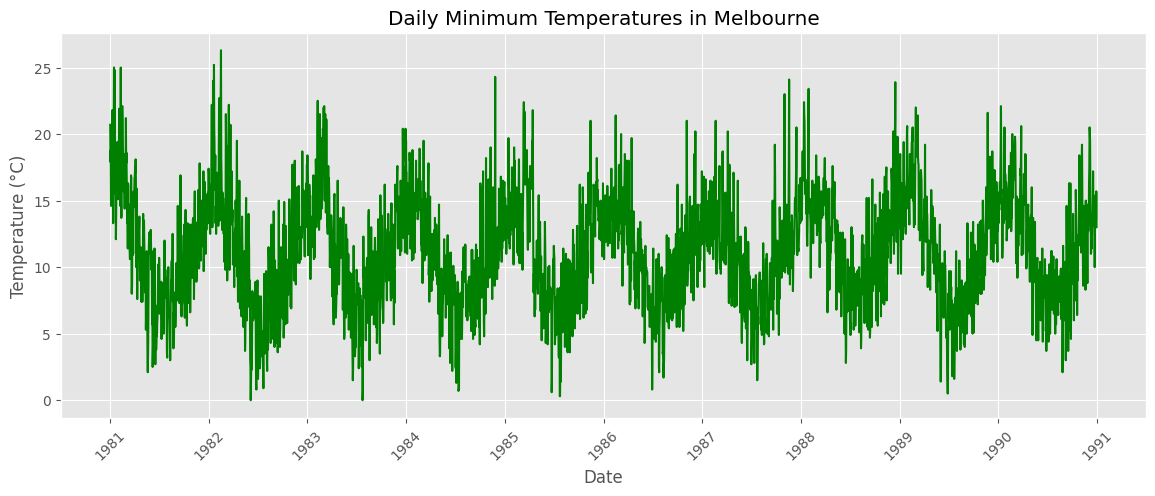

In [ ]:
#Draw a  line plot (time series plot)
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.plot(df.index, df['Temp'], color='green')
plt.title('Daily Minimum Temperatures in Melbourne')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

This graph shows daily minimum temperatures in Melbourne, 1981–1990.
Notice the repeating wave patterns, which show regular seasonal changes. Occasional sharp drops are rare cold nights, and peaks show warmer nights.

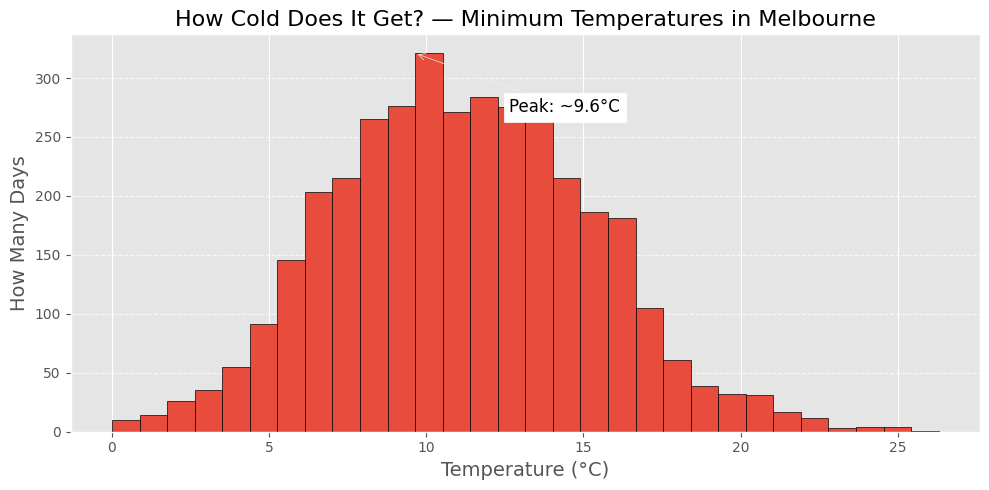

In [ ]:
# Draw a Histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

# Draw the histogram (number of days for each temperature bin)
n, bins, patches = plt.hist(
    df['Temp'],
    bins=30,
    color='#E74C3C',
    edgecolor='black'
)

# Add a descriptive title and axis labels
plt.title('How Cold Does It Get? — Minimum Temperatures in Melbourne', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('How Many Days', fontsize=14)  # Number of days with min temp in each range

# Highlight the most common (peak) temperature value
peak_temp = bins[n.argmax()]
plt.annotate(
    f'Peak: ~{peak_temp:.1f}°C',
    xy=(peak_temp, n.max()),
    xytext=(peak_temp+3, n.max()-50),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=12,
    backgroundcolor='white'
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

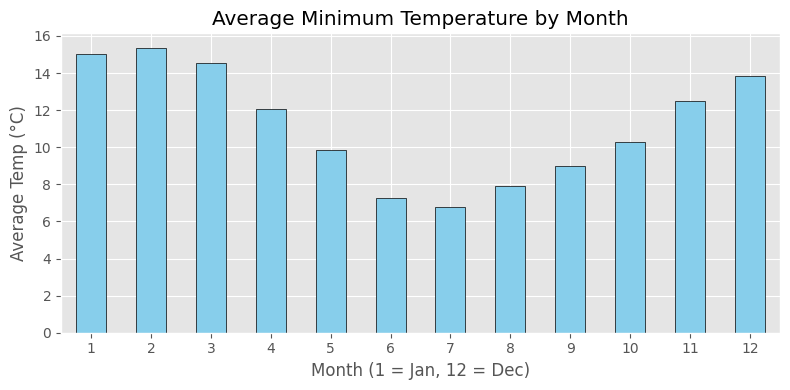

In [ ]:
# Draw a barchart
# Create a new column for month extracted from the Date index
df['Month'] = df.index.month

# Calculate the average minimum temperature for each month
monthly_avg = df.groupby('Month')['Temp'].mean()

# Plot the monthly averages as a bar chart
plt.figure(figsize=(8,4))
monthly_avg.plot(kind='bar', color='skyblue', edgecolor='black')  # Added color for visibility
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month (1 = Jan, 12 = Dec)')
plt.ylabel('Average Temp (°C)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Average minimum temperature for each month in Melbourne. The plot highlights the seasonal variation: warmest nights in summer (Dec–March) and coldest in winter (June–July).

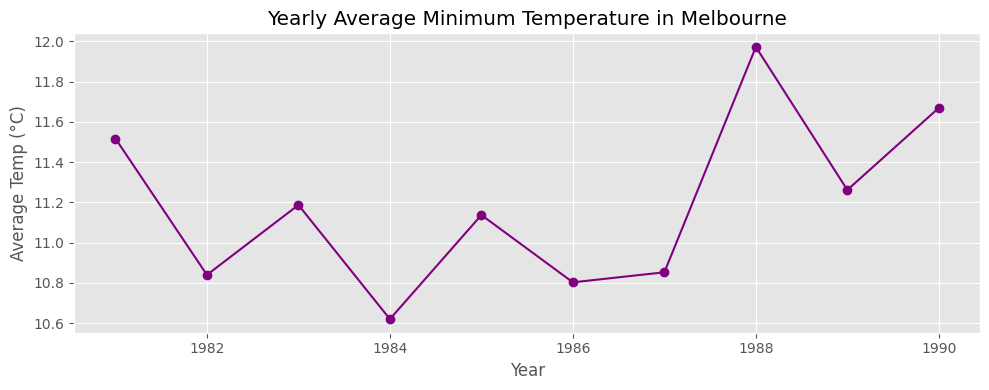

In [ ]:
# Draw a line chart
# Create a new column for the year, using the Date index
df['Year'] = df.index.year

# Calculate the average minimum temperature for each year
yearly_avg = df.groupby('Year')['Temp'].mean()

# Plot the yearly averages as a line chart
plt.figure(figsize=(10,4))
yearly_avg.plot(marker='o', color='purple')
plt.title('Yearly Average Minimum Temperature in Melbourne')
plt.xlabel('Year')
plt.ylabel('Average Temp (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

Yearly average minimum temperature in Melbourne, 1981–1990. The plot shows year-to-year variation, with no strong warming or cooling trend during this decade.

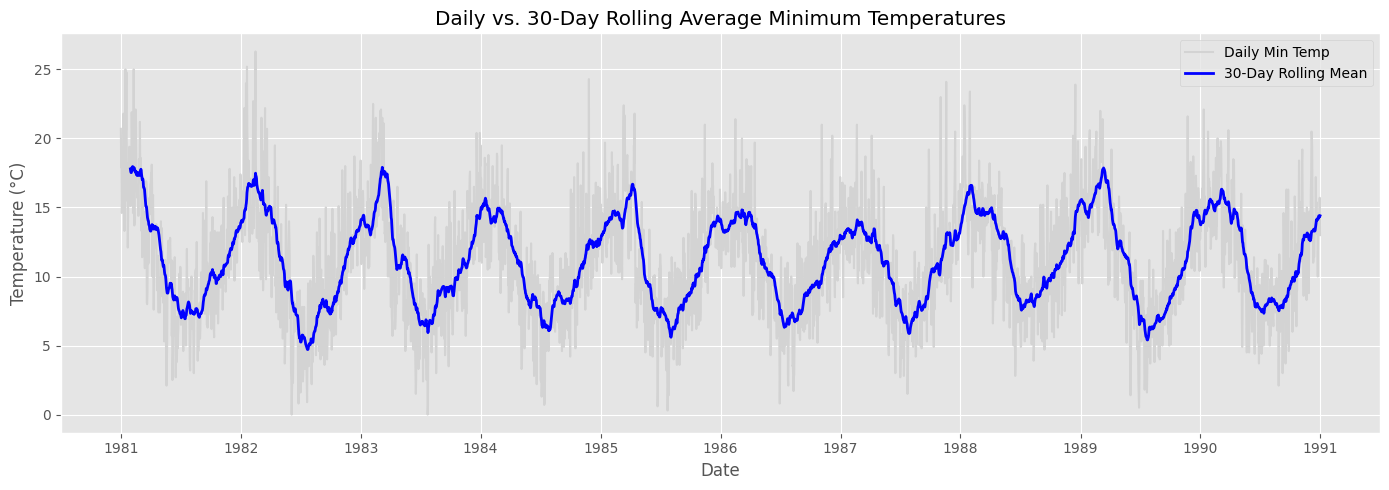

In [ ]:
# Draw a time series line plot with a rolling mean (moving average)
# Set up the figure size
plt.figure(figsize=(14,5))

# Plot the original daily minimum temperature data
plt.plot(df.index, df['Temp'], label='Daily Min Temp', color='lightgray')

# Plot the 30-day rolling mean (moving average)
plt.plot(
    df.index,
    df['Temp'].rolling(window=30).mean(),
    label='30-Day Rolling Mean',
    color='blue',
    linewidth=2
)
plt.title('Daily vs. 30-Day Rolling Average Minimum Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Daily minimum temperatures in Melbourne (light gray) and 30-day rolling average (bold blue) from 1981 to 1990.
The 30-day rolling mean smooths out short-term fluctuations and highlights the clear seasonal cycles in Melbourne’s climate, with regular rises and falls each year.

In [ ]:
# Find the mean and standard deviation of the temperature data
mean = df['Temp'].mean()
std = df['Temp'].std()

# Identify outliers as days where temperature is more than 2 standard deviations from the mean
outliers = df[(df['Temp'] < mean - 2*std) | (df['Temp'] > mean + 2*std)]
print("Number of outliers:", len(outliers))
display(outliers.head())

Number of outliers: 167


,Temp,Month,Year
Date,,,
1981-01-01,20.7,1,1981
1981-01-09,21.8,1,1981
1981-01-10,20.0,1,1981
1981-01-14,21.5,1,1981
1981-01-15,25.0,1,1981


In [ ]:
# Run the Augmented Dickey-Fuller test to check if the series is stationary
adf_result = adfuller(df['Temp'])

print("ADF Test Results:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"  {key}: {value}")

# Interpretation
if adf_result[1] < 0.05:
    print("Result: The data is stationary (p < 0.05). Good for ARIMA modeling!")
else:
    print("Result: The data is NOT stationary (p >= 0.05). Consider differencing or other transformations.")

ADF Test Results:
ADF Statistic: -4.444652847181708
p-value: 0.00024723724658534517
Critical Values:
  1%: -3.432154725699155
  5%: -2.8623374271161723
  10%: -2.567194482813802
Result: The data is stationary (p < 0.05). Good for ARIMA modeling!


#Note: auto_arima (pmdarima) not available on Colab. Manual grid search for ARIMA(p,d,q) used.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Initialize variables to keep track of the best model
best_aic = float("inf")
best_order = None
best_model = None

# Try different combinations of p, d, q
for p in range(0, 4):
    for d in range(0, 2):
        for q in range(0, 4):
            try:
                # Create and fit the ARIMA model
                model = ARIMA(df['Temp'], order=(p,d,q))
                results = model.fit()
                # If this model has a lower AIC
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p,d,q)
                    best_model = results
            except:
                continue
print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")
print(best_model.summary())

Best ARIMA order: (3, 0, 1) with AIC: 16760.85769987077
                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 3647
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -8374.429
Date:                Wed, 09 Jul 2025   AIC                          16760.858
Time:                        20:03:03   BIC                          16798.068
Sample:                             0   HQIC                         16774.110
                               - 3647                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4827      0.798     14.381      0.000       9.918      13.048
ar.L1          1.4830      0.018     80.177      0.000       1.447       1.

 ARIMA(3,0,1) model summary. This model was selected based on minimum AIC and shows all parameters are statistically significant.

In [ ]:
# Forecast the next 15 days
forecast_steps = 15
forecast_obj = best_model.get_forecast(steps=forecast_steps)
forecast = forecast_obj.predicted_mean

In [ ]:
# Make a new datetime index for forecasted days
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
forecast_df = pd.DataFrame({'Forecast': forecast.values}, index=forecast_index)
forecast_df

,Forecast
1991-01-01,12.989422
1991-01-02,13.330646
1991-01-03,13.489413
1991-01-04,13.512259
1991-01-05,13.492576
1991-01-06,13.470051
1991-01-07,13.451822
1991-01-08,13.436154
1991-01-09,13.421248
1991-01-10,13.406453


The best ARIMA model is used to forecast the minimum daily temperatures for the next 15 days.
The resulting DataFrame shows the predicted temperature for each future date,
allowing us to see expected trends in the short term.


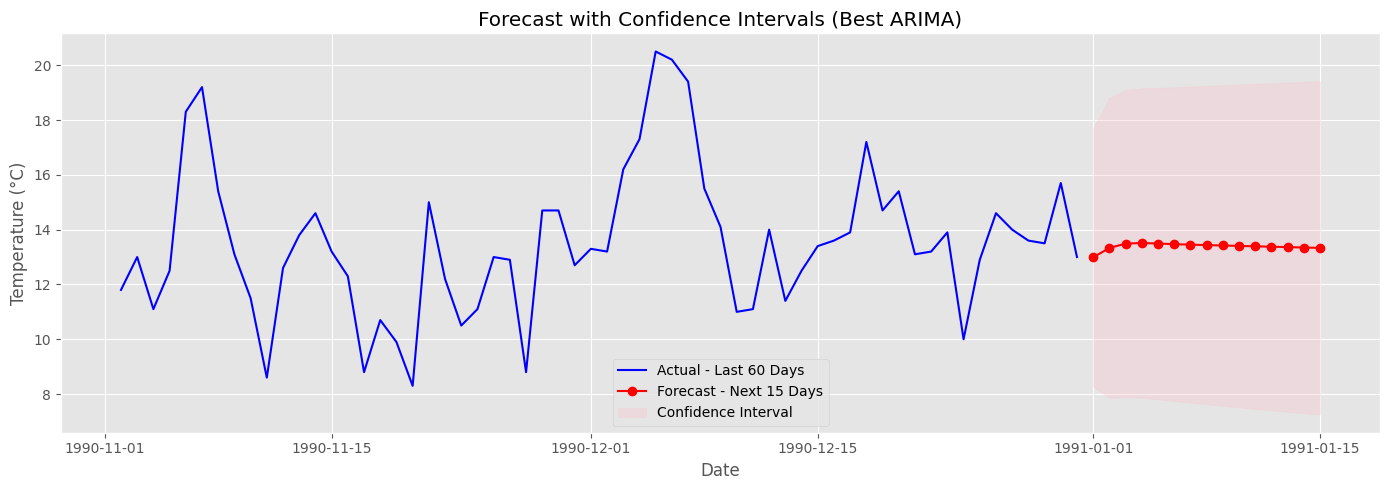

In [ ]:
# Plot actual temperatures (last 60 days) and forecast for the next 15 days, with confidence intervals
import matplotlib.pyplot as plt

# Calculate confidence intervals
conf_int = best_model.get_forecast(steps=forecast_steps).conf_int()

plt.figure(figsize=(14, 5))
plt.plot(df['Temp'][-60:], label='Actual - Last 60 Days', color='blue')
plt.plot(forecast_index, forecast, label='Forecast - Next 15 Days', color='red', marker='o')
plt.fill_between(
    forecast_index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='Confidence Interval'
)
plt.title("Forecast with Confidence Intervals (Best ARIMA)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Forecast of Minimum Temperatures (Jan 1–15, 1991) with Confidence Intervals

- This graph shows two things: the actual daily minimum temperatures (blue line) for the past 60 days, and the forecasted temperatures (red dots) for the first 15 days of January 1991.

- The pink shaded area shows the range where temperatures are most likely to fall, based on a 95% confidence level. This means we’re quite sure the real temperatures will be somewhere inside that area.

- The pink area gets wider the further we look ahead, which means the forecast becomes less certain the more we try to predict the future.

- This chart helps us understand both the temperature predictions and how confident we can be about them.

> **Figure:** Forecasted minimum temperatures (Jan 1–15, 1991) from ARIMA(3,0,1), with 95% confidence intervals.


In [ ]:
# Define the forecast dates
forecast_dates = pd.date_range('1991-01-01', periods=15)

# Create a DataFrame for the forecast
forecast_values = [
    12.989422, 13.330646, 13.489413, 13.512259, 13.492576,
    13.470051, 13.451822, 13.436154, 13.421248, 13.406453,
    13.391685, 13.376989, 13.362396, 13.347918, 13.333552
]
forecast_df = pd.DataFrame({'Forecast_Temp': forecast_values}, index=forecast_dates)

# Merge with actual data based on index
compare_df = forecast_df.merge(df, left_index=True, right_index=True, how='left')
compare_df.rename(columns={'Temp': 'Actual_Temp'}, inplace=True)
compare_df['Difference'] = compare_df['Forecast_Temp'] - compare_df['Actual_Temp']

print(compare_df)

            Forecast_Temp  Actual_Temp  Month  Year  Difference
1991-01-01      12.989422          NaN    NaN   NaN         NaN
1991-01-02      13.330646          NaN    NaN   NaN         NaN
1991-01-03      13.489413          NaN    NaN   NaN         NaN
1991-01-04      13.512259          NaN    NaN   NaN         NaN
1991-01-05      13.492576          NaN    NaN   NaN         NaN
1991-01-06      13.470051          NaN    NaN   NaN         NaN
1991-01-07      13.451822          NaN    NaN   NaN         NaN
1991-01-08      13.436154          NaN    NaN   NaN         NaN
1991-01-09      13.421248          NaN    NaN   NaN         NaN
1991-01-10      13.406453          NaN    NaN   NaN         NaN
1991-01-11      13.391685          NaN    NaN   NaN         NaN
1991-01-12      13.376989          NaN    NaN   NaN         NaN
1991-01-13      13.362396          NaN    NaN   NaN         NaN
1991-01-14      13.347918          NaN    NaN   NaN         NaN
1991-01-15      13.333552          NaN  

In [ ]:
# Dates for forecast
dates = pd.date_range('1991-01-01', periods=15)

# Actual minimum temperatures
actual_lows = [
    16.2, 17.2, 25.4, 16.3, 12.3,
    10.0, 12.2, 13.8, 12.7, 13.8,
    20.4, 15.4, 11.4, 14.7, 14.4
]

# Your forecasted values
forecast_lows = [
    12.989422, 13.330646, 13.489413, 13.512259, 13.492576,
    13.470051, 13.451822, 13.436154, 13.421248, 13.406453,
    13.391685, 13.376989, 13.362396, 13.347918, 13.333552
]

compare_df = pd.DataFrame({
    'Date': dates,
    'Actual_Low': actual_lows,
    'Forecast_Low': forecast_lows
})
compare_df['Difference'] = compare_df['Forecast_Low'] - compare_df['Actual_Low']
compare_df['Absolute_Error'] = compare_df['Difference'].abs()

print(compare_df)

         Date  Actual_Low  Forecast_Low  Difference  Absolute_Error
0  1991-01-01        16.2     12.989422   -3.210578        3.210578
1  1991-01-02        17.2     13.330646   -3.869354        3.869354
2  1991-01-03        25.4     13.489413  -11.910587       11.910587
3  1991-01-04        16.3     13.512259   -2.787741        2.787741
4  1991-01-05        12.3     13.492576    1.192576        1.192576
5  1991-01-06        10.0     13.470051    3.470051        3.470051
6  1991-01-07        12.2     13.451822    1.251822        1.251822
7  1991-01-08        13.8     13.436154   -0.363846        0.363846
8  1991-01-09        12.7     13.421248    0.721248        0.721248
9  1991-01-10        13.8     13.406453   -0.393547        0.393547
10 1991-01-11        20.4     13.391685   -7.008315        7.008315
11 1991-01-12        15.4     13.376989   -2.023011        2.023011
12 1991-01-13        11.4     13.362396    1.962396        1.962396
13 1991-01-14        14.7     13.347918   -1.352

#### Comparing Forecasted and Actual Minimum Temperatures (Jan 1–15, 1991)


**Reference:**  
Taken from actual daily minimum temperatures: [Extreme Weather Watch - Melbourne 1991](https://www.extremeweatherwatch.com/cities/melbourne/year-1991)


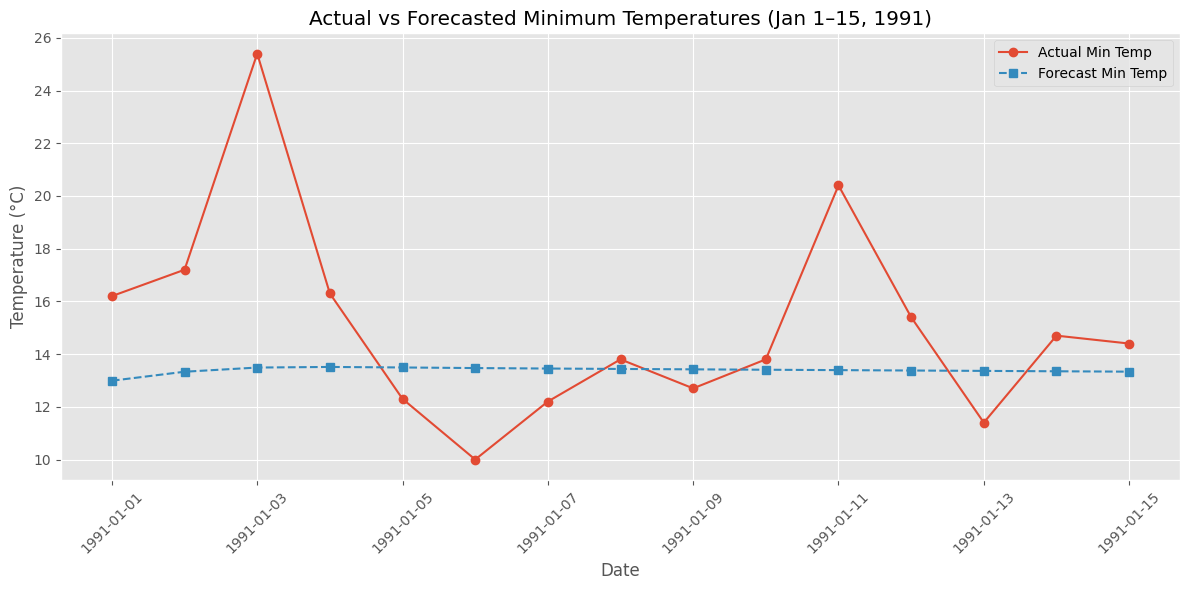

In [ ]:
# Plot Actual vs Forecasted Minimum Temperatures for Jan 1–15, 1991
plt.figure(figsize=(12,6))
plt.plot(compare_df['Date'], compare_df['Actual_Low'], marker='o', label='Actual Min Temp')
plt.plot(compare_df['Date'], compare_df['Forecast_Low'], marker='s', linestyle='--', label='Forecast Min Temp')

plt.title('Actual vs Forecasted Minimum Temperatures (Jan 1–15, 1991)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Comparison of actual and forecasted daily minimum temperatures in Melbourne,January 1–15, 1991.
The solid orange line shows the real observed temperatures, while the dashed blue line shows the ARIMA model’s forecast.